In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import sklearn.linear_model

In [8]:
# Replace 'file_path.csv' with the actual file path
file_path = r"oecd_bli_2015.csv"

# Read the CSV file into a DataFrame
df_oecd = pd.read_csv(file_path)


In [9]:
df_oecd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3292 entries, 0 to 3291
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LOCATION               3292 non-null   object 
 1   Country                3292 non-null   object 
 2   INDICATOR              3292 non-null   object 
 3   Indicator              3292 non-null   object 
 4   MEASURE                3292 non-null   object 
 5   Measure                3292 non-null   object 
 6   INEQUALITY             3292 non-null   object 
 7   Inequality             3292 non-null   object 
 8   Unit Code              3292 non-null   object 
 9   Unit                   3292 non-null   object 
 10  PowerCode Code         3292 non-null   int64  
 11  PowerCode              3292 non-null   object 
 12  Reference Period Code  0 non-null      float64
 13  Reference Period       0 non-null      float64
 14  Value                  3292 non-null   float64
 15  Flag

In [10]:
# File path
file = r"gdp_per_capita.csv"

# Read the CSV file with a specified encoding
df_gdp = pd.read_csv(file, sep='\t', encoding='ISO-8859-1', na_values="n/a")



In [11]:
def prepare_country_stats(oecd_bli, gdp_per_capita):

    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]

    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)

    gdp_per_capita.set_index("Country", inplace=True)

    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,

                                  left_index=True, right_index=True)

    full_country_stats.sort_values(by="GDP per capita", inplace=True)

    remove_indices = [0, 1, 6, 8, 33, 34, 35]

    keep_indices = list(set(range(36)) - set(remove_indices))

    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [12]:
country_df= prepare_country_stats(df_oecd, df_gdp)

In [13]:
country_df

,GDP per capita,Life satisfaction
Country,,
Poland,"12,495.334",5.8
Chile,"13,340.905",6.7
Slovak Republic,"15,991.736",6.1
Czech Republic,"17,256.918",6.5
Greece,"18,064.288",4.8
Slovenia,"20,732.482",5.7
Spain,"25,864.721",6.5
Korea,"27,195.197",5.8
Italy,"29,866.581",6.0


In [14]:
import numpy as np

In [34]:
X=np.c_[country_df["GDP per capita"]]

In [35]:
Y=np.c_[country_df["Life satisfaction"]]

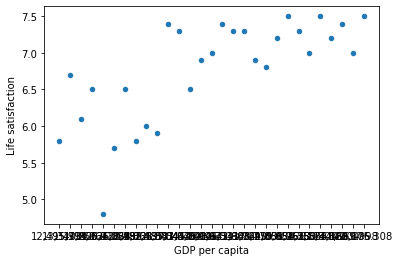

In [36]:
country_df.plot(kind="scatter" ,x="GDP per capita",y="Life satisfaction")
plt.show()

In [37]:
from sklearn.linear_model import LinearRegression


In [40]:
model=sklearn.linear_model.LinearRegression()

#Step: Training of the model
model.fit(X,Y)

LinearRegression()

In [43]:
#Make a prediction for a specific country

X_bis = [[1000]]
print(model.predict(X_bis))

[4.274]


L'équation de la droite est : y = 0.00x + 4.20


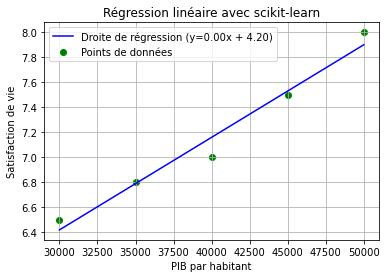

In [ ]:
"""import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Exemple de données
x = np.array([40000, 45000, 30000, 35000, 50000])  # PIB par habitant
y = np.array([7, 7.5, 6.5, 6.8, 8])  # Satisfaction de vie

# Reshape des données (scikit-learn attend une matrice 2D pour les features)
X = x.reshape(-1, 1)  # Transforme x en colonne 2D
Y = y  # Pas besoin de reshaper pour la cible

# Entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X, Y)

# Récupérer les coefficients
a = model.coef_[0]  # Pente
b = model.intercept_  # Ordonnée à l'origine

# Afficher l'équation de la droite
print(f"L'équation de la droite est : y = {a:.2f}x + {b:.2f}")

# Générer des prédictions pour tracer la droite
x_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # Génère des valeurs régulières pour x
y_line = model.predict(x_line)  # Calcule les y correspondants

# Visualisation
plt.scatter(x, y, color="green", label="Points de données")  # Points d'origine
plt.plot(x_line, y_line, color="blue", label=f"Droite de régression (y={a:.2f}x + {b:.2f})")  # Droite
plt.title("Régression linéaire avec scikit-learn")
plt.xlabel("PIB par habitant")
plt.ylabel("Satisfaction de vie")
plt.legend()
plt.grid()
plt.show()"""


In [ ]:
# make a prediction 
